# Data Casestudy

In [1]:
#imported basic libraries
import time
import pandas as pd
import pygsheets as pg
from pyhive import presto
from datetime import date, timedelta
import boto3 
from tempfile import NamedTemporaryFile
import psycopg2
import numpy as np

from __future__ import division

import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_style('darkgrid')

In [3]:
#Read the file and collected basic info about dataframe
data=pd.read_csv('D:/SampleCaseStudyData.csv')
data.head(10)


,Unnamed: 0,type,canceledFlag,time2Checkin,arrivalMonth,arrivalWeek,arrivalDay,numberWeekendnights,numberNights,adults,...,repeatFlag,historicCancellations,historicBookings,roomType,assignedType,changesFlag,deposit,waitingDays,customerSegment,numberofRequests
0,0,R,0,342,July,27,1,0,0,2,...,0,0,0,C,C,3,No Deposit,0,T,0
1,1,R,0,737,July,27,1,0,0,2,...,0,0,0,C,C,4,No Deposit,0,T,0
2,2,R,0,7,July,27,1,0,1,1,...,0,0,0,A,C,0,No Deposit,0,T,0
3,3,R,0,13,July,27,1,0,1,1,...,0,0,0,A,A,0,No Deposit,0,T,0
4,4,R,0,14,July,27,1,0,2,2,...,0,0,0,A,A,0,No Deposit,0,T,1
5,5,R,0,14,July,27,1,0,2,2,...,0,0,0,A,A,0,No Deposit,0,T,1
6,6,R,0,0,July,27,1,0,2,2,...,0,0,0,C,C,0,No Deposit,0,T,0
7,7,R,0,9,July,27,1,0,2,2,...,0,0,0,C,C,0,No Deposit,0,T,1
8,8,R,1,85,July,27,1,0,3,2,...,0,0,0,A,A,0,No Deposit,0,T,1
9,9,R,1,75,July,27,1,0,3,2,...,0,0,0,D,D,0,No Deposit,0,T,0


In [4]:
info=data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             119390 non-null  int64  
 1   type                   119390 non-null  object 
 2   canceledFlag           119390 non-null  int64  
 3   time2Checkin           119390 non-null  int64  
 4   arrivalMonth           119390 non-null  object 
 5   arrivalWeek            119390 non-null  int64  
 6   arrivalDay             119390 non-null  int64  
 7   numberWeekendnights    119390 non-null  int64  
 8   numberNights           119390 non-null  int64  
 9   adults                 119390 non-null  int64  
 10  chidren                119386 non-null  float64
 11  country                118902 non-null  object 
 12  segment                119390 non-null  object 
 13  repeatFlag             119390 non-null  int64  
 14  historicCancellations  119390 non-nu

In [5]:
data.describe()

,Unnamed: 0,canceledFlag,time2Checkin,arrivalWeek,arrivalDay,numberWeekendnights,numberNights,adults,chidren,repeatFlag,historicCancellations,historicBookings,changesFlag,waitingDays,numberofRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.031912,0.087118,0.137097,0.221124,2.321149,0.571363
std,34465.068657,0.482918,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.175767,0.844336,1.497437,0.652306,17.594721,0.792798
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5.000000


In [6]:
d2=data.drop_duplicates()
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             119390 non-null  int64  
 1   type                   119390 non-null  object 
 2   canceledFlag           119390 non-null  int64  
 3   time2Checkin           119390 non-null  int64  
 4   arrivalMonth           119390 non-null  object 
 5   arrivalWeek            119390 non-null  int64  
 6   arrivalDay             119390 non-null  int64  
 7   numberWeekendnights    119390 non-null  int64  
 8   numberNights           119390 non-null  int64  
 9   adults                 119390 non-null  int64  
 10  chidren                119386 non-null  float64
 11  country                118902 non-null  object 
 12  segment                119390 non-null  object 
 13  repeatFlag             119390 non-null  int64  
 14  historicCancellations  119390 non-nu

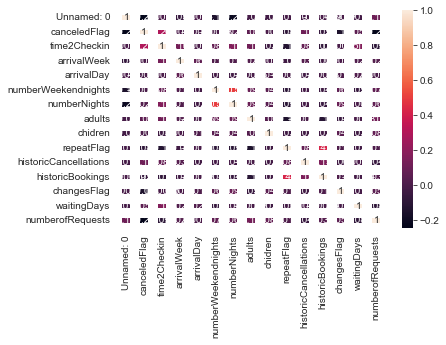

In [7]:
#no duplicate rows found,plotting heatmap to identify correlation
corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 10)
plt.show()


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'canceledFlag'}>,
        <AxesSubplot:title={'center':'time2Checkin'}>,
        <AxesSubplot:title={'center':'arrivalWeek'}>],
       [<AxesSubplot:title={'center':'arrivalDay'}>,
        <AxesSubplot:title={'center':'numberWeekendnights'}>,
        <AxesSubplot:title={'center':'numberNights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'chidren'}>,
        <AxesSubplot:title={'center':'repeatFlag'}>,
        <AxesSubplot:title={'center':'historicCancellations'}>,
        <AxesSubplot:title={'center':'historicBookings'}>],
       [<AxesSubplot:title={'center':'changesFlag'}>,
        <AxesSubplot:title={'center':'waitingDays'}>,
        <AxesSubplot:title={'center':'numberofRequests'}>,
        <AxesSubplot:>]], dtype=object)

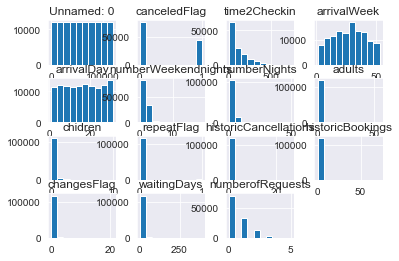

In [8]:
data.hist()

In [9]:
df=data.select_dtypes(include=['object'])
df.head(5)


,type,arrivalMonth,country,segment,roomType,assignedType,deposit,customerSegment
0,R,July,PRT,dir,C,C,No Deposit,T
1,R,July,PRT,dir,C,C,No Deposit,T
2,R,July,GBR,dir,A,C,No Deposit,T
3,R,July,GBR,cor,A,A,No Deposit,T
4,R,July,GBR,onl,A,A,No Deposit,T


In [10]:
print(df['type'].unique())
print(df['arrivalMonth'].unique())
print(df['country'].unique())
print(df['segment'].unique())
print(df['roomType'].unique())
print(df['assignedType'].unique())
print(df['deposit'].unique())
print(df['customerSegment'].unique())

['R' 'C']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GL

In [11]:
#assigned values to categorical variables
value_map_d = {'T':1,'C':2,'G':3}
data['customerSegment_num'] = data['customerSegment'].apply(lambda x: value_map_d.get(x))

value_map_d2 = {'No Deposit':1,'Refundable':2,'Non Refund':3}
data['deposit_num'] = data['deposit'].apply(lambda x: value_map_d2.get(x))

value_map_d3 = {'R':1,'C':2}
data['type_num'] = data['type'].apply(lambda x: value_map_d3.get(x))

value_map_d4 = {'C':12, 'A':1, 'D':2, 'E':3, 'G':4, 'F':5, 'I':6, 'B':7, 'H':8, 'P':9, 'L':10, 'K':11}
data['assignedType_num'] = data['assignedType'].apply(lambda x: value_map_d4.get(x))

value_map_d5 = {'C':10, 'A':1, 'D':2, 'E':3, 'G':4, 'F':5, 'H':6, 'L':7, 'P':8, 'B':9}
data['roomType_num'] = data['roomType'].apply(lambda x: value_map_d5.get(x))

value_map_d6 = {'dir':8, 'cor':1, 'onl':2, 'off':3, 'com':4, 'gro':5, 'und':6, 'avi':7}
data['segment_num'] = data['segment'].apply(lambda x: value_map_d6.get(x))

value_map_d7 = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, 
          "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
data['arrivalMonth_num'] = data['arrivalMonth'].apply(lambda x: value_map_d7.get(x))


In [12]:
#counting cancellation and finding percentage cancellation

data['count']=1

data_cancel=data.sort_values(['type','arrivalMonth_num']).groupby(["type", "arrivalMonth_num"])["canceledFlag","count"].agg(sum).reset_index(drop=False)

data_cancel['percent']=data_cancel['canceledFlag']/data_cancel['count']


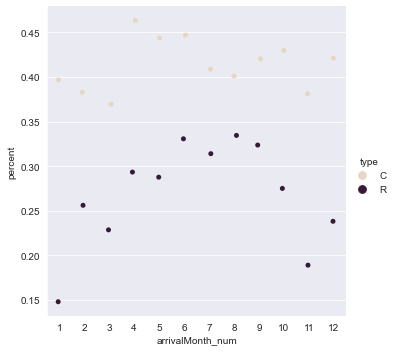

In [13]:
sns.catplot(x="arrivalMonth_num",y='percent',hue="type", palette="ch:.25", data=data_cancel)


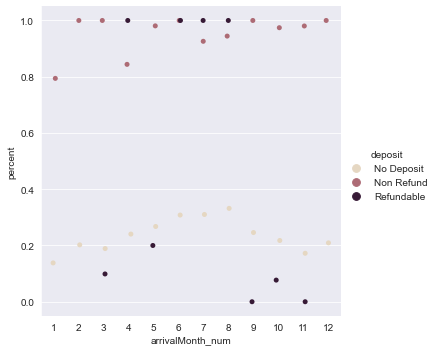

In [14]:
"""
R type has low cancellation rate
Cancellation peaks in June to August for R and April to June for C type
"""
data_cancel_deposit=data.sort_values(['type','arrivalMonth_num']).groupby(["type", "arrivalMonth_num","deposit"])["canceledFlag","count"].agg(sum).reset_index(drop=False)
data_cancel_deposit['percent']=data_cancel_deposit['canceledFlag']/data_cancel_deposit['count']
#data_cancel_deposit['arrivalMonth']=pd.Categorical(data_cancel_deposit['arrivalMonth'], categories=months, ordered=True)
#data_cancel_deposit=data_cancel_deposit.sort_values(['type','arrivalMonth'])
data_cancel_deposit_1=data_cancel_deposit[data_cancel_deposit['type']=='R']

sns.catplot(x="arrivalMonth_num",y='percent',hue="deposit", palette="ch:.25", data=data_cancel_deposit_1)


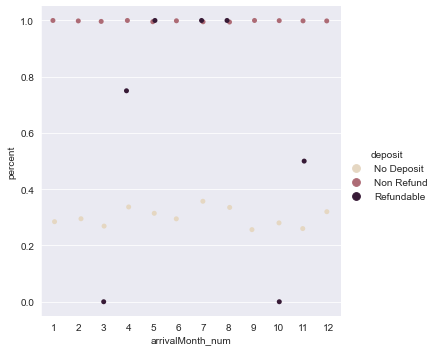

In [15]:

data_cancel_deposit_2=data_cancel_deposit[data_cancel_deposit['type']=='C']

sns.catplot(x="arrivalMonth_num",y='percent',hue="deposit", palette="ch:.25", data=data_cancel_deposit_2)


In [16]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [17]:
#splitting data into train and test models
non_cat_cols = [col for col in data.columns if data[col].dtype != 'O']

y = data['canceledFlag']

X = data[['time2Checkin',
'arrivalWeek',
'arrivalDay',
'numberWeekendnights',
'numberNights',
'adults',
'chidren',
'repeatFlag',
'historicCancellations',
'historicBookings',
'changesFlag',
'waitingDays',
'numberofRequests',
'customerSegment_num',
'deposit_num',
'type_num',
'assignedType_num',
'roomType_num',
'segment_num',
'arrivalMonth_num',
#'count'
]]
"""
X = data.drop("canceledFlag",axis = 1)
y = data["canceledFlag"]
"""
#include categorical variable afterwards
X=X.replace(np.nan,0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [18]:
#Using 4 different classifier to train data and hence check cancellation behavior basis available features
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7756298579469311
Confusion Matrix : 
[[16097  2652]
 [ 4045  7054]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     18749
           1       0.73      0.64      0.68     11099

    accuracy                           0.78     29848
   macro avg       0.76      0.75      0.75     29848
weighted avg       0.77      0.78      0.77     29848



In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8038394532296972
Confusion Matrix : 
[[15725  3024]
 [ 2831  8268]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     18749
           1       0.73      0.74      0.74     11099

    accuracy                           0.80     29848
   macro avg       0.79      0.79      0.79     29848
weighted avg       0.80      0.80      0.80     29848



In [20]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_rfc=clf.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
conf = confusion_matrix(y_test, y_pred_rfc)
clf_report = classification_report(y_test, y_pred_rfc)
print(f"Accuracy Score of RF is : {acc_rfc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")  

Accuracy Score of RF is : 0.8512128115786652
Confusion Matrix : 
[[17246  1503]
 [ 2938  8161]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     18749
           1       0.84      0.74      0.79     11099

    accuracy                           0.85     29848
   macro avg       0.85      0.83      0.84     29848
weighted avg       0.85      0.85      0.85     29848



In [21]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
acc_lgr = accuracy_score(y_test, y_pred_lgr)
conf = confusion_matrix(y_test, y_pred_lgr)
clf_report = classification_report(y_test, y_pred_lgr)
print(f"Accuracy Score of RF is : {acc_lgr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")  

Accuracy Score of RF is : 0.7743232377378719
Confusion Matrix : 
[[18037   712]
 [ 6024  5075]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.96      0.84     18749
           1       0.88      0.46      0.60     11099

    accuracy                           0.77     29848
   macro avg       0.81      0.71      0.72     29848
weighted avg       0.80      0.77      0.75     29848



In [22]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier','Random Forest','Logistic Regression'],
    'Score' : [acc_knn, acc_dtc, acc_rfc, acc_lgr]
})

models.sort_values(by = 'Score', ascending = False)


,Model,Score
2,Random Forest,0.851213
1,Decision Tree Classifier,0.803839
0,KNN,0.775630
3,Logistic Regression,0.774323


In [23]:
#Random forest works best in predicting cancellation of a booking
#Normalizing data to find if it improves model prediction

In [24]:
def min_max(column):
    return (column-column.min())/(column.max()-column.min())
for col in X.columns:
    X[col]=min_max(X[col])
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
scaled=scaler.fit_transform(X)
scaled_df=pd.DataFrame(scaled,columns=X.columns)
scaled_df.describe()

,time2Checkin,arrivalWeek,arrivalDay,numberWeekendnights,numberNights,adults,chidren,repeatFlag,historicCancellations,historicBookings,changesFlag,waitingDays,numberofRequests,customerSegment_num,deposit_num,type_num,assignedType_num,roomType_num,segment_num,arrivalMonth_num
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.141128,0.503176,0.493275,0.048821,0.050006,0.033753,0.010389,0.031912,0.003351,0.001904,0.010530,0.005936,0.114273,0.021903,0.122858,0.664461,0.085582,0.065703,0.330324,0.504771
std,0.144997,0.261637,0.292694,0.052559,0.038166,0.010532,0.039856,0.175767,0.032474,0.020798,0.031062,0.044999,0.158560,0.113527,0.327758,0.472181,0.180697,0.154777,0.281922,0.280965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024423,0.288462,0.233333,0.000000,0.020000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.272727
50%,0.093623,0.519231,0.500000,0.052632,0.040000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.142857,0.545455
75%,0.217096,0.711538,0.733333,0.105263,0.060000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,1.000000,0.090909,0.111111,0.571429,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X=scaled_df.replace(np.nan,0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8069217367997856
Confusion Matrix : 
[[16489  2272]
 [ 3491  7596]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     18761
           1       0.77      0.69      0.72     11087

    accuracy                           0.81     29848
   macro avg       0.80      0.78      0.79     29848
weighted avg       0.80      0.81      0.80     29848



In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.805883141248995
Confusion Matrix : 
[[15810  2951]
 [ 2843  8244]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     18761
           1       0.74      0.74      0.74     11087

    accuracy                           0.81     29848
   macro avg       0.79      0.79      0.79     29848
weighted avg       0.81      0.81      0.81     29848



In [27]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_rfc=clf.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
conf = confusion_matrix(y_test, y_pred_rfc)
clf_report = classification_report(y_test, y_pred_rfc)
print(f"Accuracy Score of RF is : {acc_rfc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")  

Accuracy Score of RF is : 0.8524189225408738
Confusion Matrix : 
[[17323  1438]
 [ 2967  8120]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     18761
           1       0.85      0.73      0.79     11087

    accuracy                           0.85     29848
   macro avg       0.85      0.83      0.84     29848
weighted avg       0.85      0.85      0.85     29848



In [28]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
acc_lgr = accuracy_score(y_test, y_pred_lgr)
conf = confusion_matrix(y_test, y_pred_lgr)
clf_report = classification_report(y_test, y_pred_lgr)
print(f"Accuracy Score of RF is : {acc_lgr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")  

Accuracy Score of RF is : 0.7725475743768426
Confusion Matrix : 
[[18047   714]
 [ 6075  5012]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.96      0.84     18761
           1       0.88      0.45      0.60     11087

    accuracy                           0.77     29848
   macro avg       0.81      0.71      0.72     29848
weighted avg       0.80      0.77      0.75     29848



In [29]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier','Random Forest','Logistic Regression'],
    'Score' : [acc_knn, acc_dtc, acc_rfc, acc_lgr]
})

models.sort_values(by = 'Score', ascending = False)


,Model,Score
2,Random Forest,0.852419
0,KNN,0.806922
1,Decision Tree Classifier,0.805883
3,Logistic Regression,0.772548


In [30]:
#Normalized data had same behavior hence not feasible in this case
#model can be more accurately trained basis including country feature but might not give apt result for country with low data set available
